In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [3]:
# Load the dataset from Hugging Face Hub
train_dataset = load_dataset("kmack/Phishing_urls", split="train")
test_dataset = load_dataset("kmack/Phishing_urls", split="test")
valid_dataset = load_dataset("kmack/Phishing_urls", split="valid")

# Convert to pandas DataFrame
train_df = train_dataset.to_pandas()[:500000:]
test_df = test_dataset.to_pandas()
valid_df = valid_dataset.to_pandas()


all_df = [train_df, test_df,valid_df]
for i, df in enumerate(all_df):
    df['url'] = df['text']
    df.drop('text',axis=1,inplace=True)
print(train_df.head())

   label                                                url
0      0             xenophongroup.com/montjoie/compgns.htm
1      1    www.azzali.eu/&usg=AOvVaw2phVSb_ENMrkATGNx5LQ0l
2      1                     guildmusic.edu.au/js/index.htm
3      1  memo.unexpectedrunner.com/ezxgytw4et\nholotili...
4      0  en.wikipedia.org/wiki/Category:American_televi...


In [4]:
import pandas as pd

# assuming you have 'id' or can hash rows
train_hashes = set(train_df.apply(lambda x: hash(tuple(x)), axis=1))
test_hashes = set(test_df.apply(lambda x: hash(tuple(x)), axis=1))
val_hashes = set(valid_df.apply(lambda x: hash(tuple(x)), axis=1))

print("Train-Test overlap:", len(train_hashes & test_hashes))
print("Train-Valid overlap:", len(train_hashes & val_hashes))
print("Test-Valid overlap:", len(test_hashes & val_hashes))


Train-Test overlap: 0
Train-Valid overlap: 0
Test-Valid overlap: 0


In [11]:
train_df.head()

,label,url
0,0,xenophongroup.com/montjoie/compgns.htm
1,1,www.azzali.eu/&usg=AOvVaw2phVSb_ENMrkATGNx5LQ0l
2,1,guildmusic.edu.au/js/index.htm
3,1,memo.unexpectedrunner.com/ezxgytw4et\nholotili...
4,0,en.wikipedia.org/wiki/Category:American_televi...


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

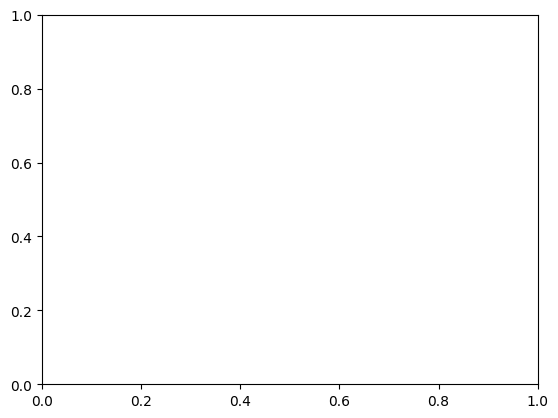

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

feature = "url"
sns.kdeplot(train_df[feature], label="Train")
sns.kdeplot(valid_df[feature], label="Valid")
sns.kdeplot(test_df[feature], label="Test")
plt.legend()
plt.show()


In [13]:
print(train_df.head(),test_df.head(),valid_df.head())


   label                                                url
0      0             xenophongroup.com/montjoie/compgns.htm
1      1    www.azzali.eu/&usg=AOvVaw2phVSb_ENMrkATGNx5LQ0l
2      1                     guildmusic.edu.au/js/index.htm
3      1  memo.unexpectedrunner.com/ezxgytw4et\nholotili...
4      0  en.wikipedia.org/wiki/Category:American_televi...    label                                                url
0      1    www.linuxplanet.com/linuxplanet/reviews/4149/1/
1      1  sdnmargorejo1-403.sch.id/images/login.alibaba....
2      0  '9d345009-a-62cb3a1a-s-sites.googlegroups.com/...
3      0            everyculture.com/Ma-Ni/New-Zealand.html
4      1                    www.aoseocn.acseosn.selfie.ltd/    label                                                url
0      0       absoluteastronomy.com/topics/Sri_Lankan_Navy
1      1                    www.angelfire.com/amiga/grotto/
2      1  www.etc-meisai.jp.lmxnzp.shop/kaduxn.php?lia71...
3      0  http://torcache.net/torrent/DC

In [6]:
print("Shape of the training dataset is :",train_df.shape)
print("No. of missing values :",train_df.isnull().sum())
print("Duplicate values in urls:",train_df["url"].duplicated().sum())
print("Number of unique values : ",train_df.nunique())

Shape of the training dataset is : (500000, 2)
No. of missing values : label    0
url      0
dtype: int64
Duplicate values in urls: 24171
Number of unique values :  label         2
url      475829
dtype: int64


In [7]:
train_df = train_df.drop_duplicates(subset =['url'])

In [8]:
import pandas as pd
import numpy as np
import re


In [9]:
import math

In [10]:
import re

text = "My email is test123@example.com"
pattern = r"\w+@\w+\.\w+"

match = re.search(pattern, text)
if match:
    print("Found email:", match.group())


Found email: test123@example.com


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score


c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [12]:
import re

def clean_url(url):
    url = url.lower().strip()
    url = re.sub(r'https?://', '', url)       # remove http/https
    url = re.sub(r'www\.', '', url)           # remove www
    url = re.sub(r'[^a-z0-9./?=_-]', '', url) # keep only useful chars
    return url

train_df['url'] = train_df['url'].apply(clean_url)
valid_df['url'] = valid_df['url'].apply(clean_url)
test_df['url'] = test_df['url'].apply(clean_url)


C:\Users\rrpra\AppData\Local\Temp\ipykernel_8776\1474082469.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['url'] = train_df['url'].apply(clean_url)


In [13]:
train_df.duplicated().sum()

np.int64(14142)

In [14]:
train_df = train_df.drop_duplicates(subset =['url'])

In [15]:
# Combine text for fitting tokenizer
all_texts = train_df['url'].tolist() + valid_df['url'].tolist() + test_df['url'].tolist()

tokenizer = Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(all_texts)

# Convert to sequences
maxlen = 200  # trunc/pad length
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['url']), maxlen=maxlen)
X_valid = pad_sequences(tokenizer.texts_to_sequences(valid_df['url']), maxlen=maxlen)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['url']), maxlen=maxlen)

y_train = train_df['label'].values
y_valid = valid_df['label'].values
y_test = test_df['label'].values

vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:", vocab_size)


Vocab size: 43


In [17]:
X_train

array([[ 0,  0,  0, ..., 18,  6, 12],
       [ 0,  0,  0, ..., 41, 23, 13],
       [ 0,  0,  0, ..., 18,  6, 12],
       ...,
       [ 0,  0,  0, ...,  4,  2, 12],
       [ 0,  0,  0, ..., 15, 18, 15],
       [ 0,  0,  0, ..., 15, 18, 15]], shape=(460463, 200), dtype=int32)

In [43]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),

    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalMaxPooling1D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=1024,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/10
238/450 ━━━━━━━━━━━━━━━━━━━━ 3:54 1s/step - accuracy: 0.7370 - loss: 0.5484

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


2216/2216 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     35239
           1       0.86      0.89      0.87     35643

    accuracy                           0.87     70882
   macro avg       0.87      0.87      0.87     70882
weighted avg       0.87      0.87      0.87     70882

ROC-AUC: 0.8716478682272485


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title("Accuracy over epochs"); plt.show()


including bilstm

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

model_up = Sequential([
    Embedding(vocab_size, 128),
    Conv1D(256, 7, activation='relu', padding='same'),
    MaxPooling1D(3),
    Conv1D(128, 5, activation='relu', padding='same'),
    MaxPooling1D(3),
    Bidirectional(LSTM(64)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [ ]:
model_up.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_up.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)

history = model_up.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=1024,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 71s 127ms/step - accuracy: 0.7902 - loss: 0.4367 - val_accuracy: 0.8631 - val_loss: 0.3181 - learning_rate: 0.0010
Epoch 2/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 62s 123ms/step - accuracy: 0.8844 - loss: 0.2813 - val_accuracy: 0.8653 - val_loss: 0.3118 - learning_rate: 0.0010
Epoch 3/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.8965 - loss: 0.2492 - val_accuracy: 0.8716 - val_loss: 0.2942 - learning_rate: 0.0010
Epoch 4/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.9017 - loss: 0.2350 - val_accuracy: 0.8745 - val_loss: 0.2835 - learning_rate: 0.0010
Epoch 5/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 62s 122ms/step - accuracy: 0.9073 - loss: 0.2203 - val_accuracy: 0.8706 - val_loss: 0.2931 - learning_rate: 0.0010
Epoch 6/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 61s 122ms/step - accuracy: 0.9119 - loss: 0.2091 - val_accuracy: 0.8753 - val_loss: 0.2795 - learning_rate: 0.0010
Epoch 7/10
505/505 ━━━━━━━━━━━━━━━━━━━━ 62s 122ms/step - accuracy: 0.9

In [ ]:
y_pred_up = (model_up.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_up))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_up))


2216/2216 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     35239
           1       0.86      0.90      0.88     35643

    accuracy                           0.88     70882
   macro avg       0.88      0.87      0.87     70882
weighted avg       0.88      0.88      0.87     70882

ROC-AUC: 0.8748934304524261


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from sklearn.model_selection import train_test_split

# --- Split dataset into 3 clients ---
client_dfs = np.array_split(train_df, 3)

def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, 128, embeddings_initializer=HeNormal()),
        Conv1D(256, 7, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Conv1D(128, 5, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Bidirectional(LSTM(64, kernel_initializer=HeNormal())),
        Dense(128, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- Federated training function ---
def federated_train(client_dfs, rounds=5, local_epochs=1, batch_size=1024):
    # Initialize global model
    global_model = build_model(vocab_size, maxlen)

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []

        for i, df in enumerate(client_dfs):
            print(f"Client {i+1}: training on {len(df)} samples")

            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone global model to client
            client_model = clone_model(global_model)
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            # Collect weights and sizes
            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))

        # Weighted average of client weights
        new_weights = []
        for weights in zip(*client_weights):
            avg = np.sum([w * size for w, size in zip(weights, client_sizes)], axis=0) / np.sum(client_sizes)
            new_weights.append(avg)

        # Update global model
        global_model.set_weights(new_weights)
        print(f"Round {r+1} completed. Global model updated.")

    return global_model

# --- Run federated training ---
global_model = federated_train(client_dfs, rounds=5, local_epochs=1)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



=== Federated Round 1/5 ===
Client 1: training on 172170 samples
169/169 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - accuracy: 0.7142 - loss: 0.5288
Client 2: training on 172170 samples
169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7237 - loss: 0.5216
Client 3: training on 172169 samples
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 149ms/step - accuracy: 0.7112 - loss: 0.5292


ValueError: You called `set_weights(weights)` on layer 'sequential_3' with a weight list of length 15, but the layer was expecting 0 weights.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----------------------------
# PARAMETERS
# ----------------------------
embedding_dim = 128
maxlen = 200
batch_size = 1024
rounds = 5
local_epochs = 1
n_clients = 5  # Number of federated clients
learning_rate = 1e-3

# ----------------------------
# SPLIT DATA FAIRLY
# ----------------------------
client_dfs = np.array_split(train_df.sample(frac=1, random_state=42), n_clients)

# ----------------------------
# MODEL BUILD FUNCTION
# ----------------------------
def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, embeddings_initializer=HeNormal(), input_length=maxlen),
        Conv1D(256, 7, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Conv1D(128, 5, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Bidirectional(LSTM(64, kernel_initializer=HeNormal())),
        Dense(128, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ----------------------------
# BUILD AND FORCE-BUILD GLOBAL MODEL
# ----------------------------
global_model = build_model(vocab_size, maxlen)
global_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build

# ----------------------------
# VALIDATION DATA
# ----------------------------
X_val = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
y_val = valid_df['label'].values

# ----------------------------
# FEDERATED TRAINING FUNCTION
# ----------------------------
def federated_train(client_dfs, global_model, X_val, y_val, rounds=5, local_epochs=1, batch_size=1024):
    best_val_acc = 0.0

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []
        client_val_scores = []

        # Train each client locally
        for i, df in enumerate(client_dfs):
            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone and force-build client model
            client_model = clone_model(global_model)
            client_model(tf.zeros((1, maxlen), dtype=tf.int32))
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            # Evaluate client model on global validation
            val_loss, val_acc = client_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
            print(f"Client {i+1} validation accuracy: {val_acc:.4f}")

            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))
            client_val_scores.append(val_acc)

        # ----------------------------
        # VALIDATION-AWARE WEIGHT AGGREGATION
        # ----------------------------
        # Normalize validation scores to use as weight multipliers
        val_scores_np = np.array(client_val_scores)
        val_weights = val_scores_np / val_scores_np.sum()

        new_weights = []
        for weights in zip(*client_weights):
            weighted_avg = np.sum([w * size * val_w for w, size, val_w in zip(weights, client_sizes, val_weights)], axis=0)
            weighted_avg /= np.sum([size * val_w for size, val_w in zip(client_sizes, val_weights)])
            new_weights.append(weighted_avg)

        global_model.set_weights(new_weights)

        # ----------------------------
        # EVALUATE GLOBAL MODEL ON VALIDATION
        # ----------------------------
        val_loss, val_acc = global_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        print(f"Global validation accuracy after round {r+1}: {val_acc:.4f}, loss: {val_loss:.4f}")

        # Optional: adjust learning rate if validation plateaus
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            old_lr = float(global_model.optimizer.lr.numpy())
            new_lr = max(old_lr * 0.5, 1e-6)
            global_model.optimizer.lr.assign(new_lr)
            print(f"No improvement → reducing LR: {old_lr:.6f} → {new_lr:.6f}")

    return global_model

# ----------------------------
# RUN FEDERATED TRAINING
# ----------------------------
global_model = federated_train(client_dfs, global_model, X_val, y_val,
                               rounds=rounds, local_epochs=local_epochs, batch_size=batch_size)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Federated Round 1/5 ===
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.6532 - loss: 0.6033
Client 1 validation accuracy: 0.8284
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - accuracy: 0.6563 - loss: 0.6004
Client 2 validation accuracy: 0.8307
101/101 ━━━━━━━━━━━━━━━━━━━━ 17s 146ms/step - accuracy: 0.6507 - loss: 0.6039
Client 3 validation accuracy: 0.8287
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - accuracy: 0.6522 - loss: 0.6065
Client 4 validation accuracy: 0.8167
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.6481 - loss: 0.6074
Client 5 validation accuracy: 0.8246
Global validation accuracy after round 1: 0.8069, loss: 0.4421

=== Federated Round 2/5 ===
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - accuracy: 0.7777 - loss: 0.4884
Client 1 validation accuracy: 0.8437
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - accuracy: 0.7794 - loss: 0.4830
Client 2 validation accuracy: 0.8417
101/101 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - accuracy: 0.7910 - loss: 0.4

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8596 - loss: 0.3164

Test Accuracy: 0.8610, Test Loss: 0.3157
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8627    0.8568    0.8597     35239
           1     0.8594    0.8651    0.8623     35643

    accuracy                         0.8610     70882
   macro avg     0.8610    0.8610    0.8610     70882
weighted avg     0.8610    0.8610    0.8610     70882


Test ROC-AUC: 0.9381


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.activations import gelu
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ----------------------------
# PARAMETERS
# ----------------------------
embedding_dim = 128
maxlen = 200
batch_size = 1024
rounds = 5
local_epochs = 1
n_clients = 4  # number of federated clients
learning_rate = 1e-3

# ----------------------------
# SPLIT DATA INTO CLIENTS
# ----------------------------
client_dfs = np.array_split(train_df.sample(frac=1, random_state=42), n_clients)

# ----------------------------
# MODEL BUILD FUNCTION
# ----------------------------
def build_model(vocab_size, maxlen):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, embeddings_initializer=HeNormal(), input_length=maxlen),
        Conv1D(256, 7, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Conv1D(128, 5, activation=gelu, padding='same', kernel_initializer=HeNormal()),
        MaxPooling1D(3),
        Bidirectional(LSTM(64, kernel_initializer=HeNormal())),
        Dense(128, activation=gelu, kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(1, activation='sigmoid', kernel_initializer=HeNormal())
    ])
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ----------------------------
# BUILD AND FORCE-BUILD GLOBAL MODEL
# ----------------------------
global_model = build_model(vocab_size, maxlen)
global_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build

# ----------------------------
# VALIDATION DATA
# ----------------------------
X_val = pad_sequences(tokenizer.texts_to_sequences(valid_df['text']), maxlen=maxlen)
y_val = valid_df['label'].values

# ----------------------------
# FEDERATED TRAINING FUNCTION
# ----------------------------
def federated_train_simple(client_dfs, global_model, X_val, y_val, rounds=5, local_epochs=1, batch_size=1024):
    best_val_acc = 0.0

    for r in range(rounds):
        print(f"\n=== Federated Round {r+1}/{rounds} ===")
        client_weights = []
        client_sizes = []

        # Train each client locally
        for i, df in enumerate(client_dfs):
            X_client = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen)
            y_client = df['label'].values

            # Clone global model for client
            client_model = clone_model(global_model)
            client_model(tf.zeros((1, maxlen), dtype=tf.int32))  # force build
            client_model.set_weights(global_model.get_weights())
            client_model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

            # Local training
            client_model.fit(X_client, y_client, epochs=local_epochs, batch_size=batch_size, verbose=1)

            client_weights.append(client_model.get_weights())
            client_sizes.append(len(df))

        # ----------------------------
        # WEIGHTED AVERAGE OF CLIENT WEIGHTS
        # ----------------------------
        new_weights = []
        for weights in zip(*client_weights):
            weighted_avg = np.sum([w * size for w, size in zip(weights, client_sizes)], axis=0) / np.sum(client_sizes)
            new_weights.append(weighted_avg)

        global_model.set_weights(new_weights)

        # ----------------------------
        # EVALUATE GLOBAL MODEL ON VALIDATION
        # ----------------------------
        val_loss, val_acc = global_model.evaluate(X_val, y_val, batch_size=batch_size, verbose=0)
        print(f"Global validation accuracy after round {r+1}: {val_acc:.4f}, loss: {val_loss:.4f}")

        # Optional: adjust learning rate if validation plateaus
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            old_lr = float(global_model.optimizer.lr.numpy())
            new_lr = max(old_lr * 0.5, 1e-6)
            global_model.optimizer.lr.assign(new_lr)
            print(f"No improvement → reducing LR: {old_lr:.6f} → {new_lr:.6f}")

    return global_model

# ----------------------------
# RUN FEDERATED TRAINING
# ----------------------------
global_model = federated_train_simple(client_dfs, global_model, X_val, y_val,
                                      rounds=rounds, local_epochs=local_epochs, batch_size=batch_size)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Federated Round 1/5 ===
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 158ms/step - accuracy: 0.6965 - loss: 0.5479
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.7130 - loss: 0.5319
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.6803 - loss: 0.5645
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.6889 - loss: 0.5583
Global validation accuracy after round 1: 0.8334, loss: 0.3915

=== Federated Round 2/5 ===
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8094 - loss: 0.4311
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8059 - loss: 0.4393
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.8106 - loss: 0.4329
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8045 - loss: 0.4432
Global validation accuracy after round 2: 0.8538, loss: 0.3393

=== Federated Round 3/5 ===
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8453 - loss: 0.3561
127/127 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8527 - loss: 0.3520
127/127

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8653 - loss: 0.3067

Test Accuracy: 0.8660, Test Loss: 0.3054
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8828    0.8423    0.8621     35239
           1     0.8509    0.8894    0.8697     35643

    accuracy                         0.8660     70882
   macro avg     0.8668    0.8659    0.8659     70882
weighted avg     0.8667    0.8660    0.8659     70882


Test ROC-AUC: 0.9412


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# ----------------------------
# Prepare test data
# ----------------------------
X_test_pad = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=maxlen)
y_test_arr = test_df['label'].values

# ----------------------------
# Evaluate global model
# ----------------------------
test_loss, test_acc = global_model.evaluate(X_test_pad, y_test_arr, batch_size=batch_size, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------------
# Predictions
# ----------------------------
y_pred_prob = global_model.predict(X_test_pad, batch_size=batch_size)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# ----------------------------
# Classification report
# ----------------------------
print("\nClassification Report:")
print(classification_report(y_test_arr, y_pred, digits=4))

# ----------------------------
# ROC-AUC Score
# ----------------------------
roc_auc = roc_auc_score(y_test_arr, y_pred_prob)
print(f"\nTest ROC-AUC: {roc_auc:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8653 - loss: 0.3067

Test Accuracy: 0.8660, Test Loss: 0.3054
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8828    0.8423    0.8621     35239
           1     0.8509    0.8894    0.8697     35643

    accuracy                         0.8660     70882
   macro avg     0.8668    0.8659    0.8659     70882
weighted avg     0.8667    0.8660    0.8659     70882


Test ROC-AUC: 0.9412
